# Lab 4. Probabilistic Inference

## Task 4.1 Iris Classification Using Naïve Bayes

---

## Problem Descriptions
The task is to predict the iris species from the four features of the flowers (sepal length, sepal width, petal length and petal width).

## Implementation and Results

In the following code, we are implementing a Naive Bayes classifier model on the Iris dataset to predict species, through the following steps:
1.   Load the iris dataset
2.   Select Sepal length and Petal length as features and species is selected as target.
3.   Split the dataset into test and training sets (20%, 80% proportions respectively)
4.   Build a Guassian Naive Bayes model and fit the training data into the model.
5.   Predict species for the test data
6.   Evaluate the performance of the model on the basis of the predicted species vs the actual species, through factors such as accuracy, confusion matrix, etc.
7.   Plot a scatter plot with features on the axis and the coloured points denoting the species.

Comments are included in the code to explain the purpose of each method.



Install and import external libraries

In [ ]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=8354a851a0b26877eabec302f453da18274246546b40060e5f995ba8dca4b5e0
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


Loading the data and building the Naive Bayes Classifier Model

In [ ]:
# load the iris dataset
iris = datasets.load_iris() 

# Use only sepal length and petal length as features
#X = iris.data[:, [0,2]]

# Use all features
X = iris.data

# The dependant variable is iris species
Y = iris.target


# split the dataset into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# Build the Naive Bayes model
nb = GaussianNB() 
# fit the data into the naive Bayes model
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc) # Accuracy of prediction of the model
print("Confusion Matrix:\n", cm) # Confusion matrix to see the number of correct and incorrect predictions made by the model for each species
print("Prior:\n", nb.class_prior_) # The prior probabilities of each species
print("Mean:\n", nb.theta_) # Mean of the selected features for each species
print("Variance:\n", nb.sigma_) # Variance of the features for each each species


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  6  0]
 [ 0  2 11]]
Prior:
 [0.325      0.36666667 0.30833333]
Mean:
 [[5.01538462 3.44358974 1.45384615 0.24102564]
 [5.94772727 2.75681818 4.26363636 1.325     ]
 [6.55675676 2.98918919 5.48378378 2.04054054]]
Variance:
 [[0.11771203 0.15271532 0.03120316 0.01113741]
 [0.27794938 0.09290806 0.22822314 0.036875  ]
 [0.33488678 0.11447772 0.25271001 0.06024836]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


Plotting feature distribution for Iris Classification

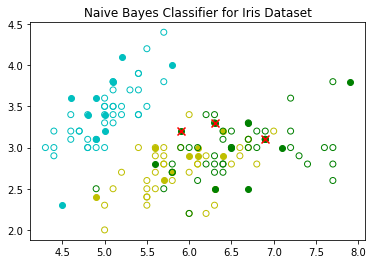

In [ ]:
# Scatter plot for species representation
colours = 'cyg'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)
  
error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()


## Discussions
In this task, we created a program to implement iris classification using Naive Bayes model.

**Q1.** Formulate the problem of iris classification using Naïve Bayes method. <br>
> **Ans**. The problem of iris classification using Naive Bayes method involves the use of Bayes theorem to calculate the probability of a flower belonging to a particular species, on the basis of its features such as sepal length, width etc. <br>
The Naive Bayes method works under the assumption that each feature is independent of the other, and has no relation between them. <br>
Using the the above assumption, we can calculate <br>*P(Y | X)* i.e. the probability that the iris flower belongs to class Y, given its features X, <br>
based on <br>
*P(xi | Y)* which is probability of observing the feature xi for a flower that belongs to class Y. <br>
*P(Y)* which is the probability of a randomly chosen flower belonging to class Y. <br>
*P(X)* which is the probability of observing the features X for any flower, regardless of its class.<br> with the following formula
```
P(Y|X) = P(x1|Y) * P(x2|Y) * P(x3|Y) * P(x4|Y) * P(Y) / P(X)
```
To classify a new flower, we calculate the probability of it belong to each class, and predict the class having the highest probability.

**Q2.** Complete the program and report the results. <br>
> **Ans**. The completed code is implemented in the above code segment.<br>
In the output, the accuracy of the model was 86.7% - 93.3% with only 2 - 4 incorrect predictions made by the model as indicated by the confusion matrix.

**Q3.** Use the full iris dataset (all four features instead of two we discussed above), and discuss your results. <br>
> **Ans**. To use the full iris dataset, we remove the subset for iris.data. <br>
After using all the features, the accuracy of the model increased to 90% - 96% with only 1 - 3 incorrect predictions made by the model as indicated by the confusion matrix. <br>
This indicates that the classifier model becomes more accurate through the use of additional features.

## Task 4.2 Diabetes Diagnosis

---

### Problem Descriptions
For diabetes diagnosis, we try to predict if the patient is suffered from a certain disease or the progression level of the disease, based on various observations from patients such as basic personal details (age, gender, height, weight etc), body test data (blood sugar, heart rate, lipoproteins etc) and symptoms (fever, headache etc)

## Implementation and Results

In the following code, we are implementing a Naive Bayes classifier model on the diabetes dataset to predict diabetes class, through the following steps:
1.   Load the diabetes dataset
2.   Select all features and diabetes is selected as target.
3.   Categorize response variable into 3 categories based on the values: 0-150, 150-300, and 300+
4.   Split the dataset into test and training sets (20%, 80% proportions respectively)
5.   Build a Guassian Naive Bayes model and fit the training data into the model.
6.   Predict diabetes class for the test data
7.   Evaluate the performance of the model on the basis of the predicted class vs the actual class, through factors such as accuracy, confusion matrix, etc.

Comments are included in the code to explain the purpose of each method.


Install and import required libraries

In [ ]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load the dataset and building gaussian naive bayes classifier model.

In [ ]:
# load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use all features
X = diabetes.data

# Categorize response variable into 3 categories: 0-150, 150-300, and 300+
Y = [math.floor(x/150) for x in diabetes.target]


# split the dataset into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# Build the Naive Bayes model
nb = GaussianNB() 
# fit the data into the naive Bayes model
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc) # Accuracy of prediction of the model
print("Confusion Matrix:\n", cm) # Confusion matrix to see the number of correct and incorrect predictions made by the model for each species
print("Prior:\n", nb.class_prior_) # The prior probabilities of each species
print("Mean:\n", nb.theta_) # Mean of the selected features for each species
print("Variance:\n", nb.sigma_) # Variance of the features for each each species


Accuracy: 0.550561797752809
Confusion Matrix:
 [[29 22  0]
 [16 20  2]
 [ 0  0  0]]
Prior:
 [0.52974504 0.4305949  0.03966006]
Mean:
 [[-0.0083118  -0.00233305 -0.01908206 -0.01571692 -0.01151703 -0.01040439
   0.01803525 -0.02015483 -0.02543175 -0.01766828]
 [ 0.01162051  0.00113789  0.02128534  0.02068698  0.00987317  0.00671879
  -0.01610344  0.01739018  0.02656293  0.01559973]
 [ 0.00408573  0.00982794  0.07955709  0.02777442  0.00678504  0.00470305
  -0.0357746   0.04116192  0.04214879  0.04921932]]
Variance:
 [[0.00238215 0.00224291 0.00150827 0.00154846 0.00202852 0.00202028
  0.00256418 0.00158975 0.00153742 0.0017536 ]
 [0.00198094 0.00226802 0.00209131 0.00232649 0.00228999 0.00231632
  0.00152282 0.0021484  0.00189656 0.00208728]
 [0.00234803 0.0022252  0.00175641 0.00272361 0.00148389 0.00130407
  0.00120531 0.00275034 0.00119667 0.00190653]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Att

## Discussions
In this task, we created a program to implement diabetes diagnosis using Naive Bayes model.

**Q1.** Formulate the problem of diabetes diagnosis using Naïve Bayes method. <br>
> **Ans**. The problem of diabetes diagnosis using Naive Bayes method involves the use of Bayes theorem to calculate the probability of a patient suffering from diabetes and the progression of the disease, on the basis of patient observations used as features for our model.<br>
The Naive Bayes method works under the assumption that each feature is independent of the other, and has no relation between them. <br>
Using the the above assumption, we can calculate <br>*P(Y | X)* i.e. the probability that the patient falls into either of the diabetes category, given the features X, <br>
based on <br>
*P(xi | Y)* which is probability of observing the feature xi for the patient that belongs to diabetes class Y. <br>
*P(Y)* which is the probability of a randomly chosen patient belonging to diabetes class Y. <br>
*P(X)* which is the probability of observing the features X for any pateint, regardless of its diabetes class.<br> with the following formula
```
P(Y|X) = ∑ P(xi|Y) * P(Y) / P(X)
```
To classify a new patient, we calculate the probability of it belong to each  diabetes class, and predict the class having the highest probability.

**Q2.** Complete the program and report the results. <br>
> **Ans**. The completed code is implemented in the above code segment.<br>
In the output, the accuracy of the model is 58% - 75% with 22 - 40 incorrect predictions made by the model as indicated by the confusion matrix. These metrics are obviously variable, depending on the random split of the training and test data.

## Task 4.3 Monty Hall Problem Using Bayesian Network

---

### Problem Descriptions
The problem can be described as follows. Behind three closed doors, there is a car (the prize) and two goats (worthless). We pick a door, say No. 1. Then the host (Monty Hall in the show), who knows what are behind the doors, opens another door that has a goat, say No. 3. <br>
Now we have the chance to decide to stick to our original choice of No. 1, or to switch to No. 2.

## Implementation and Results

In the following code, we are implementing the solution to calculate the posterior probabilities of the prize behind the individual doors, through bayesian networks. The steps for the code is as follows:
1.   Define the bayesian model structure
2.   Defining the conditional probabilities associated with the entities.
3.   Adding conditional probabilities to the model
4.   Inferring posterior probabilities and checking if the switch has a higher chance associated with winning the prize.

Comments are included in the code to explain the purpose of each method.


Install and import required libraries

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.6 MB/s eta 0:00:00


Code for implementation of Monty Hall Problem

In [ ]:
# Hyperparameter for setting the number of doors
N_DOORS = 3

# Returns conditional probability table for 3 or 4 doors
def get_CPT(n):
    if n == 3 :
      return [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
              [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
              [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]] 
    elif n == 4 :
      return [[0,   0,    0,    0,    0,    1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3], 
              [1/3, 0,    0.5,  0.5,  0,    0,   0,    0,    0.5,  0,    1/3, 0.5,  0.5,  0,    0.5,  1/3], 
              [1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0.5,  0,    0,    0,   0,    0.5,  0.5,  0,    1/3], 
              [1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0,    0,    0,    0]]
    return -1
    
# Returns prior probabilities
def get_Prior(n):
    # Initialize the list of prior probs with n elements
    prior = [[] for i in range(n)]
    
    # Calculate the probability of each element
    prob = 1 / n
    for i in range(n):
        prior[i] = [prob]
    
    return prior

# Defining the network structure
model = BayesianModel([('Contestant', 'Host'), ('Prize', 'Host')])

# Defining the CPDs:
cpd_c = TabularCPD('Contestant', N_DOORS, get_Prior(N_DOORS))
cpd_p = TabularCPD('Prize', N_DOORS, get_Prior(N_DOORS))
cpd_h = TabularCPD('Host', N_DOORS, get_CPT(N_DOORS),
                  evidence=['Contestant', 'Prize'], evidence_card=[N_DOORS, N_DOORS])

# Adding conditional probabilities to the model
model.add_cpds(cpd_c, cpd_p, cpd_h)

# Infering the posterior probability 
infer = VariableElimination(model)
posterior = infer.query(variables=['Prize'], evidence={'Contestant': 0, 'Host': 2}, show_progress=False, joint=False)
print(posterior['Prize'])


+----------+--------------+
| Prize    |   phi(Prize) |
+==========+==============+
| Prize(0) |       0.3333 |
+----------+--------------+
| Prize(1) |       0.6667 |
+----------+--------------+
| Prize(2) |       0.0000 |
+----------+--------------+


/usr/local/lib/python3.8/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


## Discussions
In this task, we created a program to implement the solution to the monty hall problem using bayesian networks.

**Q1.** Define the Monty Hall problem using Bayesian Network, providing the definition of variable, construction of the network, their prior probabilities and conditional probabilities.<br>
> **Ans**. To define the Monty Hall problem using Bayesian network, we define the following in our problem:
1.   Variable: The network has 3 variables - Contestant, Prize and Host. The Contestant variable denotes the door chosen by the contestant, the Prize 
variable denotes the door which contains the prize, and the Host variable denotes the door that the Host opened. 
2.   Network Construction: The network consists of 2 directed edges- Contestant -> Host, Prize -> Host, indicating the contestant's choice and the prized door affect the host's actions.
3.   Prior Probability: The prior probability of prize being at door 0, 1, 2 is equal i.e. 1/3. Similarly, the prior probability of contestant choosing any door from the 3 is also 1/3 for each. <br>
The conditional probabilities of host opening a specific door, given the evidence of prized door and contestant choice is given by the Conditional Probability Table from *get_CPT()* method. 
4.   Posterior Probability: To find the solution to the monty hall problem, given, host opened a specific door in knowledge of contestant's door selection and the prized door, we calculate the posterior probability of the prize being under the other 2 doors. On the basis of this probability, the contestant decides whether to stay with the current choice or to switch to the other door.

**Q2.** Complete the program to report the results. <br>
> **Ans**. The completed code is implemented in the above code.  <br>
The posterior probabilities given the contestant choosing door 0, and host choosing door 2, as provided in the result are: <br>
 Prize(0) -> 0.3333 <br>
 Prize(1) -> 0.6667 <br>
 Prize(2) -> 0.0000 <br>
 This implies switching to door 1, would be a more sensible choice.

**Q3.** If the rules of the game are changed to 4 doors, and again the contestant to choose one door and the host to open one door without the prize, re-write the program to solve the problem. <br>
> **Ans**. To change the problem to 4 doors, we change the hyperparameter N_DOORS to 4. Rest of the code will be the same. <br>
The posterior probabilities given the contestant choosing door 0, and host choosing door 2, as provided in the result are: <br>
 Prize(0) -> 0.25 <br>
 Prize(1) -> 0.375 <br>
 Prize(2) -> 0.0 <br>
 Prize(3) -> 0.375 <br>
 This implies switching to door 1 or 3 would be a more sensible choice than staying with door 0.